In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [92]:
import pandas as pd
from matplotlib import pyplot as plt

In [93]:
titanic_train=pd.read_csv("../input/titanic/train.csv")
titanic_test=pd.read_csv("../input/titanic/test.csv")

In [94]:
titanic_train.head() #it will give first five record

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
titanic_train.shape #to check how many number of record are present

(891, 12)

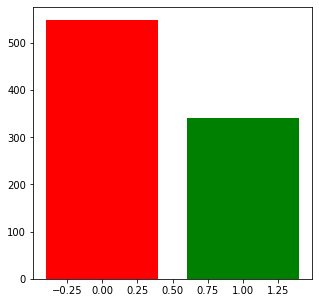

In [96]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train["Survived"].value_counts().keys()),list(titanic_train["Survived"].value_counts()),color=["red","green"])
plt.show() #.keys means to import categroial data(0,1) #red is for died and green survived 


In [97]:
titanic_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

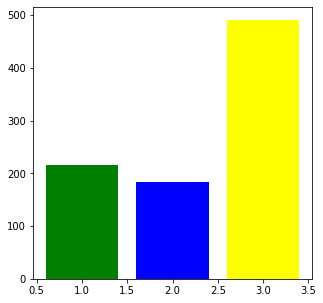

In [98]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train["Pclass"].value_counts().keys()),list(titanic_train["Pclass"].value_counts()),color=["yellow","green","blue"])
plt.show()

In [99]:
titanic_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

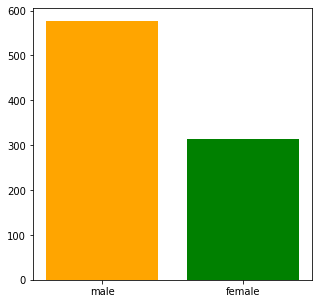

In [100]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train["Sex"].value_counts().keys()),list(titanic_train["Sex"].value_counts()),color=["orange","green"])
plt.show()

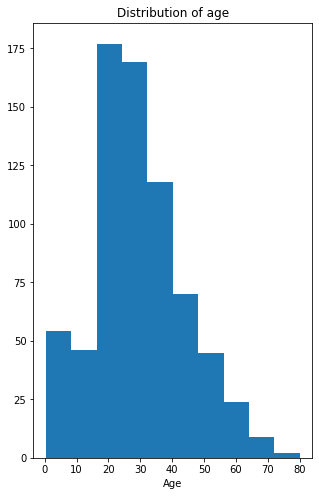

In [101]:
plt.figure(figsize=(5,8))
plt.hist(titanic_train["Age"])# ploting histogram
plt.title("Distribution of age")#setting up the title
plt.xlabel("Age")
plt.show() # the plot showing that around 175  passengers age were b/w 20 to 30 years 

In [102]:
sum(titanic_train["Survived"].isnull()) #  no null value is present 

0

In [103]:
sum(titanic_train["Age"].isnull())# checking how many is null values are there

177

In [104]:
#dropping all null values
titanic_train=titanic_train.dropna()
sum(titanic_train["Age"].isnull())

0

In [105]:
#building  classification model

x_train=titanic_train[["Age"]]
y_train=titanic_train[["Survived"]]


In [106]:
import sklearn 
from sklearn.tree import DecisionTreeClassifier

In [107]:
dtc = DecisionTreeClassifier() #creating object

In [108]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [109]:
#prdecting values

In [110]:
sum(titanic_test["Age"].isnull())

86

In [111]:
titanic_test=titanic_test.dropna()

In [ ]:
x_test=titanic_test[["Age"]]
y_pred=dtc.predict(x_test)
y_pred # 1 is survived and 0 is not survived 